In [50]:
import pyspark as ps

In [51]:
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise")
        .config("spark.sql.caseSensitive", "true")
        .getOrCreate()
        )
sc = spark.sparkContext

In [13]:
!ls

20210604_203521.Default.w0t0p0.CFBE54F3-566C-4194-BF2A-537405AC2C87.318.2748041909.log
Capstone.ipynb
Data Visualization Cheat Sheet.pdf
Galvi 2017
ISLR+Seventh+Printing.pdf
Ilya_Getsin_unix.txt
Logs
Morning Warmups
Numpy Cheat Sheet.pdf
Pandas Data Sheet.pdf
Practical Statistics for Data Scientists.pdf
Precourse
Pyspark Cheat Sheet.pdf
Repos
Supply_Chain_Shipment_Pricing_Data.csv
TrustworthyOnlineControlledExperiments_PracticalGuideToABTesting_Chapter1.pdf
Zillow.ipynb
Zillow.py
atom-one-dark-terminal
dblp.v13.7z
dblpv13.json
lectures
spark-warehouse


In [56]:
peer = spark.read.json('new.json')

In [ ]:
spark.read.json

In [57]:
peer.printSchema()

root
 |-- _id: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: string (nullable = true)
 |    |    |-- bio: string (nullable = true)
 |    |    |-- email: string (nullable = true)
 |    |    |-- gid: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- name_zh: string (nullable = true)
 |    |    |-- oid: string (nullable = true)
 |    |    |-- oid_zh: string (nullable = true)
 |    |    |-- orcid: string (nullable = true)
 |    |    |-- org: string (nullable = true)
 |    |    |-- org_zh: string (nullable = true)
 |    |    |-- orgid: string (nullable = true)
 |    |    |-- orgs: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- orgs_zh: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- sid: string (nullable = true)
 |-- doi: string (nulla

In [58]:
peer.take(10)

[Row(_id='{"$oid":"53e99784b7602d9701f3e3f4"}', abstract='', authors=[Row(_id='{"$oid":"53f46946dabfaec09f24b4ed"}', bio=None, email=None, gid=None, name='Miguel Palma', name_zh=None, oid=None, oid_zh=None, orcid=None, org=None, org_zh=None, orgid=None, orgs=None, orgs_zh=None, sid='8515747')], doi='10.1145/1665137.1665166', fos=None, isbn=None, issn=None, issue='', keywords=[], lang='en', n_citation=0, page_end=None, page_start='39', pdf=None, references=None, title='360degree', url=['http://doi.acm.org/10.1145/1665137.1665166', 'db/conf/siggraph/siggraph2009asiaart.html#Palma09', 'https://doi.org/10.1145/1665137.1665166'], venue=Row(_id='{"$oid":"53a72b2d20f7420be8c1c5a8"}', issn=None, name=None, name_d=None, name_s=None, online_issn=None, publisher=None, raw='SIGGRAPH ASIA Art Gallery & Emerging Technologies', raw_zh=None, sid=None, src=None, t=None, type=None), volume='', year=2009),
 Row(_id='53e99784b7602d9701f3e3f5', abstract=None, authors=None, doi=None, fos=None, isbn=None, is

In [59]:
peer.createOrReplaceTempView("peer")

In [61]:
result = spark.sql("""SELECT lang, COUNT(lang)
            FROM peer 
            GROUP BY lang
            """)

result.show()

+----+-----------+
|lang|count(lang)|
+----+-----------+
|  en|    1999830|
|  zh|        170|
+----+-----------+



In [60]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType
name = '_corrupt_record'
udf = UserDefinedFunction(lambda x: x.strip(','), StringType())
new_df = peer.select(*[udf(column).alias(name) if column == name else column for column in peer.columns])

In [61]:
new_df

DataFrame[_corrupt_record: string, _id: struct<$oid:string>, abstract: string, authors: array<struct<_id:struct<$oid:string>,name:string,sid:string>>, doi: string, issue: string, keywords: array<string>, lang: string, n_citation: bigint, page_start: string, title: string, url: array<string>, venue: struct<_id:struct<$oid:string>,raw:string>, volume: string, year: bigint]

In [70]:
peer.take(10)[3]['_corrupt_record'][0]

','

In [12]:
df = peer.toPandas()

AnalysisException: Since Spark 2.3, the queries from raw JSON/CSV files are disallowed when the
referenced columns only include the internal corrupt record column
(named _corrupt_record by default). For example:
spark.read.schema(schema).json(file).filter($"_corrupt_record".isNotNull).count()
and spark.read.schema(schema).json(file).select("_corrupt_record").show().
Instead, you can cache or save the parsed results and then send the same query.
For example, val df = spark.read.schema(schema).json(file).cache() and then
df.filter($"_corrupt_record".isNotNull).count().

In [26]:
n = 10
with open('dblpv13.json') as f:
    for i in range(0, n):
        print(f.readline(), end = '')

[
{"_id": {"$oid": "53e99784b7602d9701f3e3f4"}, "title": "360degree", "authors": [{"_id": {"$oid": "53f46946dabfaec09f24b4ed"}, "name": "Miguel Palma", "sid": "8515747"}], "venue": {"_id": {"$oid": "53a72b2d20f7420be8c1c5a8"}, "raw": "SIGGRAPH ASIA Art Gallery & Emerging Technologies"}, "year": 2009, "keywords": [], "n_citation": 0, "page_start": "39", "lang": "en", "volume": "", "issue": "", "doi": "10.1145/1665137.1665166", "url": ["http://doi.acm.org/10.1145/1665137.1665166", "db/conf/siggraph/siggraph2009asiaart.html#Palma09", "https://doi.org/10.1145/1665137.1665166"], "abstract": ""}
,{"_id": "53e99784b7602d9701f3e3f5", "title": "3GIO.", "venue": {"type": 0}, "year": 2011, "keywords": [], "n_citation": 0, "lang": "en"}
,{"_id": "53e99784b7602d9701f3e133", "title": "The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province.", "authors": [{"_id": "53f45728dabfaec09f209538", "name": "Peijuan Wang"}, {"_id": "5601754345cedb3

In [27]:
import IO

ModuleNotFoundError: No module named 'IO'

In [43]:
temp = [
{"_id": {"$oid": "53e99784b7602d9701f3e3f4"}, "title": "360degree", "authors": [{"_id": {"$oid": "53f46946dabfaec09f24b4ed"}, "name": "Miguel Palma", "sid": "8515747"}], "venue": {"_id": {"$oid": "53a72b2d20f7420be8c1c5a8"}, "raw": "SIGGRAPH ASIA Art Gallery & Emerging Technologies"}, "year": 2009, "keywords": [], "n_citation": 0, "page_start": "39", "lang": "en", "volume": "", "issue": "", "doi": "10.1145/1665137.1665166", "url": ["http://doi.acm.org/10.1145/1665137.1665166", "db/conf/siggraph/siggraph2009asiaart.html#Palma09", "https://doi.org/10.1145/1665137.1665166"], "abstract": ""}
,{"_id": "53e99784b7602d9701f3e3f5", "title": "3GIO.", "venue": {"type": 0}, "year": 2011, "keywords": [], "n_citation": 0, "lang": "en"}
,{"_id": "53e99784b7602d9701f3e161", "title": "360°", "authors": [{"_id": "53f46946dabfaec09f24b4ed", "name": "Miguel Palma", "org": "Miguel Palma Studio", "gid": "5b86cf1ae1cd8e14a3fc787b", "oid": "544bd9c245ce266baf189c4f"}], "venue": {"_id": "5390a74a20f70186a0e8b40b", "raw": "ACM SIGGRAPH ASIA 2009 Art Gallery & Emerging Technologies: Adaptation"}, "year": 2009, "keywords": ["global high technology", "daily short-distance flight", "enormous waste", "daily life"], "page_start": "39", "page_end": "39", "lang": "en", "volume": "", "issue": "", "issn": "", "isbn": "", "doi": "10.1145/1665137.1665166", "abstract": "360° represents the concerns that are addressed in most of my work and my approach to it: the effect of global high technology on daily life and the environment (for example, daily short-distance flights to avoid enormous wastes of time)."}]

In [44]:
temp

[{'_id': {'$oid': '53e99784b7602d9701f3e3f4'},
  'title': '360degree',
  'authors': [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},
    'name': 'Miguel Palma',
    'sid': '8515747'}],
  'venue': {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'},
   'raw': 'SIGGRAPH ASIA Art Gallery & Emerging Technologies'},
  'year': 2009,
  'keywords': [],
  'n_citation': 0,
  'page_start': '39',
  'lang': 'en',
  'volume': '',
  'issue': '',
  'doi': '10.1145/1665137.1665166',
  'url': ['http://doi.acm.org/10.1145/1665137.1665166',
   'db/conf/siggraph/siggraph2009asiaart.html#Palma09',
   'https://doi.org/10.1145/1665137.1665166'],
  'abstract': ''},
 {'_id': '53e99784b7602d9701f3e3f5',
  'title': '3GIO.',
  'venue': {'type': 0},
  'year': 2011,
  'keywords': [],
  'n_citation': 0,
  'lang': 'en'},
 {'_id': '53e99784b7602d9701f3e161',
  'title': '360°',
  'authors': [{'_id': '53f46946dabfaec09f24b4ed',
    'name': 'Miguel Palma',
    'org': 'Miguel Palma Studio',
    'gid': '5b86cf1ae1cd8e14a3fc787b',
  

In [45]:
import json
with open('temp.json', 'w') as f:
    json.dump(temp, f)

In [46]:
test = spark.read.json('temp.json', multiLine = True)

In [47]:
test.printSchema()

root
 |-- _id: string (nullable = true)
 |-- abstract: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- _id: string (nullable = true)
 |    |    |-- gid: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- oid: string (nullable = true)
 |    |    |-- org: string (nullable = true)
 |    |    |-- sid: string (nullable = true)
 |-- doi: string (nullable = true)
 |-- isbn: string (nullable = true)
 |-- issn: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- keywords: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- lang: string (nullable = true)
 |-- n_citation: long (nullable = true)
 |-- page_end: string (nullable = true)
 |-- page_start: string (nullable = true)
 |-- title: string (nullable = true)
 |-- url: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- venue: struct (nullable = true)
 |    |-- _id: str

In [10]:
import json
from tqdm import tqdm # google this
journals = []
idx = 0

new = open("new.json", "w")

with open('dblpv13.json',"r") as fp:
     for line in tqdm(fp):
        if idx > 100000: 
            break
        try:
            if len(line) < 3:
                continue
            strip_line = line.strip(',')
#             hello = json.loads(strip_line)
#             print(str(hello))
            journals.append(json.loads(strip_line))
#             new.write(strip_line)
            idx += 1
        except:
            print('fail')
            try:
                strip_line = line.strip(',')
                journals.append(json.loads(strip_line))
#                 new.write(strip_line + "\n")
                idx += 1
            except:
                idx += 1
                pass
            

100002it [00:04, 24697.35it/s]


In [4]:
journals

[{'_id': {'$oid': '53e99784b7602d9701f3e3f4'},
  'title': '360degree',
  'authors': [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},
    'name': 'Miguel Palma',
    'sid': '8515747'}],
  'venue': {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'},
   'raw': 'SIGGRAPH ASIA Art Gallery & Emerging Technologies'},
  'year': 2009,
  'keywords': [],
  'n_citation': 0,
  'page_start': '39',
  'lang': 'en',
  'volume': '',
  'issue': '',
  'doi': '10.1145/1665137.1665166',
  'url': ['http://doi.acm.org/10.1145/1665137.1665166',
   'db/conf/siggraph/siggraph2009asiaart.html#Palma09',
   'https://doi.org/10.1145/1665137.1665166'],
  'abstract': ''},
 {'_id': '53e99784b7602d9701f3e3f5',
  'title': '3GIO.',
  'venue': {'type': 0},
  'year': 2011,
  'keywords': [],
  'n_citation': 0,
  'lang': 'en'},
 {'_id': '53e99784b7602d9701f3e133',
  'title': 'The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province.',
  'authors': [{'_id': '53f45728dabfaec0

In [14]:
import pandas as pd

In [ ]:
panda_test = pd.read_json('dblpv13.json', orient = 'records')

In [18]:
journals

[{'_id': {'$oid': '53e99784b7602d9701f3e3f4'},
  'title': '360degree',
  'authors': [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},
    'name': 'Miguel Palma',
    'sid': '8515747'}],
  'venue': {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'},
   'raw': 'SIGGRAPH ASIA Art Gallery & Emerging Technologies'},
  'year': 2009,
  'keywords': [],
  'n_citation': 0,
  'page_start': '39',
  'lang': 'en',
  'volume': '',
  'issue': '',
  'doi': '10.1145/1665137.1665166',
  'url': ['http://doi.acm.org/10.1145/1665137.1665166',
   'db/conf/siggraph/siggraph2009asiaart.html#Palma09',
   'https://doi.org/10.1145/1665137.1665166'],
  'abstract': ''},
 {'_id': '53e99784b7602d9701f3e3f5',
  'title': '3GIO.',
  'venue': {'type': 0},
  'year': 2011,
  'keywords': [],
  'n_citation': 0,
  'lang': 'en'},
 {'_id': '53e99784b7602d9701f3e133',
  'title': 'The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province.',
  'authors': [{'_id': '53f45728dabfaec0

In [6]:
journals[1]['_id']

'53e99784b7602d9701f3e3f5'

In [11]:
import pandas as pd
journal_df = pd.DataFrame(journals, columns = journals[0].keys())

In [3]:
journal_df[journal_df.year == 0]

_id  \
1119   53e9978ab7602d9701f45935   
3917   53e99792b7602d9701f57ee8   
6384   53e9979bb7602d9701f67aba   
6915   53e9979eb7602d9701f6ae79   
8965   53e997a2b7602d9701f77076   
10518  53e997aab7602d9701f819dd   
11560  53e997aeb7602d9701f899cd   
13707  53e997b5b7602d9701f990ac   
16047  53e997bdb7602d9701fa7eb4   
16393  53e997bdb7602d9701faa62d   
17123  53e997c2b7602d9701faea51   
17333  53e997c2b7602d9701fafcae   
17980  53e997c6b7602d9701fb3593   
18449  53e997c6b7602d9701fb6617   
26492  53e997f1b7602d9701fee90e   
28524  53e997f4b7602d9701ff733c   
30702  53e997f8b7602d970200178c   
31557  53e997fcb7602d9702004ac7   
38797  53e9980eb7602d9702021dbe   
44081  53e9981db7602d970203862e   
46847  53e99822b7602d9702043106   
48018  53e99827b7602d9702047ec5   
48941  53e99827b7602d970204c451   
49824  53e9982cb7602d970205104e   
49884  53e9982cb7602d9702050fa0   
53203  53e99838b7602d9702060f38   
62232  53e99853b7602d970208991d   
63198  53e99858b7602d970208f06f   
67123  53e99866b7602d970209ff61   
67206  53e99866b7602d970209fc12   
86491  53e998b8b7602d97020f033f   
87923  53e998bfb7602d97020f634b   
99635  53e998e9b7602d97021285b7   

                                                   title  \
1119                                          Committees   
3917                                           Quantales   
6384                                Distributed Password   
6915                               editors' introduction   
8965                                    Combining Models   
10518                            Artificial Biochemistry   
11560                                Prediction Analysis   
13707                                      Lamella Flock   
16047                                          The Model   
16393                                    Taxonomy Design   
17123                              Selective Memoization   
17333                                     SOA Pragmatism   
17980                              System Implementation   
18449                                 Revenue Management   
26492                    Advancing Electronic Assessment   
28524                         Incremental Software Reuse   
30702           INTERNATIONALIZATION AND TRANSLATABILITY   
31557                     Interactive Geometry Remeshing   
38797                     Compiling Exceptions Correctly   
44081                        Spreadsheet Accuracy Theory   
46847                   Significant Subpatterns Matching   
48018                    Transactional Cluster Computing   
48941                                    Phish and Chips   
49824                      Private information retrieval   
49884                     PRIMITIVE INDEPENDENCE RESULTS   
53203                           Online Advertising Fraud   
62232                                     Taming of Pict   
63198                                 The Forward Search   
67123  TWO PRINCIPLES AND SIX TECHNIQUES FOR RAPID MT...   
67206        A Parallel Genetic Algorithm for Clustering   
86491  Boundary and Feature Recognition at The Univer...   
87923  Combinatorial Generation of Small Point Congur...   
99635  Construction Techniques of Graphic, Direct-Man...   

                                                 authors  \
1119           [{'name': 'TURNER G'}, {'name': 'VAN G'}]   
3917   [{'_id': '53f46db5dabfaeb22f556ca8', 'name': '...   
6384   [{'name': 'Wojciech DobrzaŃski', 'org': 'Insti...   
6915   [{'_id': '53f4d5c3dabfaef467f80997', 'name': '...   
8965   [{'_id': '53f43e1cdabfaeecd69972fe', 'name': '...   
10518  [{'_id': '5448afafdabfae87b7e639d4', 'name': '...   
11560  [{'org': 'Technion – Israel Institute of Techn...   
13707  [{'_id': '53f45a50dabfaee4dc8212de', 'name': '...   
16047  [{'name': 'Giovanni Maria Sacco', 'org': 'Univ...   
16393  [{'name': 'Wisam Dakka', 'org': 'Google Inc. N...   
17123  [{'_id': '53f4334fdabfaeb1a7bd5051', 'name': '...   
17333  [{'org': 'IBM 10712 Hellebore Rd Charlotte NC ...   
17980  [{'sid': 

In [3]:
releases_year = journal_df[['year', '_id']].groupby('year').count().reset_index()
# releases_year = releases_year.drop(index = [0, 1, 120])
releases_year.describe()

year         _id
count   112.000000  112.000000
mean   1945.258929   89.294643
std     188.584330  155.661485
min       0.000000    1.000000
25%    1935.750000    3.000000
50%    1963.500000   12.500000
75%    1991.250000   88.250000
max    2019.000000  826.000000

In [4]:
releases_year = releases_year[(releases_year['year'] > 1500) & (releases_year['year'] < 2022)]

Text(0, 0.5, 'Frequency')

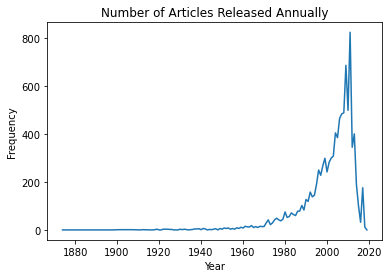

In [5]:
import matplotlib.pyplot as plt

plt.plot(releases_year.iloc[:, 0], releases_year.iloc[:,1])
plt.title("Number of Articles Released Annually")
plt.xlabel("Year")
plt.ylabel("Frequency")
# plt.savefig('img/annual_article_release.png')

Text(0, 0.5, 'Frequency')

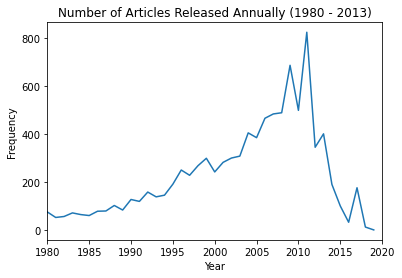

In [6]:
plt.plot(releases_year.iloc[:, 0], releases_year.iloc[:,1])
plt.title("Number of Articles Released Annually (1980 - 2013)")
plt.xlim(1980, 2020)
plt.xlabel("Year")
plt.ylabel("Frequency")
# plt.savefig('img/annual_article_release_1980-2013.png')

In [9]:
len(journal_df)

100001

In [12]:
import numpy as np
journal_df[journal_df.year == 0][pd.isna(journal_df[journal_df.year == 0]['url'])]

_id  \
26492  53e997f1b7602d9701fee90e   
28524  53e997f4b7602d9701ff733c   
30702  53e997f8b7602d970200178c   
31557  53e997fcb7602d9702004ac7   
38797  53e9980eb7602d9702021dbe   
44081  53e9981db7602d970203862e   
46847  53e99822b7602d9702043106   
48018  53e99827b7602d9702047ec5   
48941  53e99827b7602d970204c451   
49824  53e9982cb7602d970205104e   
62232  53e99853b7602d970208991d   
63198  53e99858b7602d970208f06f   
67123  53e99866b7602d970209ff61   
86491  53e998b8b7602d97020f033f   
87923  53e998bfb7602d97020f634b   
99635  53e998e9b7602d97021285b7   

                                                   title  \
26492                    Advancing Electronic Assessment   
28524                         Incremental Software Reuse   
30702           INTERNATIONALIZATION AND TRANSLATABILITY   
31557                     Interactive Geometry Remeshing   
38797                     Compiling Exceptions Correctly   
44081                        Spreadsheet Accuracy Theory   
46847                   Significant Subpatterns Matching   
48018                    Transactional Cluster Computing   
48941                                    Phish and Chips   
49824                      Private information retrieval   
62232                                     Taming of Pict   
63198                                 The Forward Search   
67123  TWO PRINCIPLES AND SIX TECHNIQUES FOR RAPID MT...   
86491  Boundary and Feature Recognition at The Univer...   
87923  Combinatorial Generation of Small Point Congur...   
99635  Construction Techniques of Graphic, Direct-Man...   

                                                 authors  \
26492  [{'_id': '53f47b87dabfaee43ed4618c', 'name': '...   
28524  [{'_id': '53f443f6dabfaedd74de4a22', 'name': '...   
30702  [{'_id': '53f43b89dabfaedce556178d', 'name': '...   
31557  [{'_id': '54351b46dabfaebba58a10ee', 'name': '...   
38797  [{'_id': '548f6041dabfaef989f098e8', 'name': '...   
44081  [{'_id': '53f3a3d2dabfae4b34acb968', 'name': '...   
46847  [{'_id': '53f380c0dabfae4b349f700b', 'name': '...   
48018  [{'_id': '53f467cddabfaee02ad9a66c', 'name': '...   
48941  [{'_id': '53f431fedabfaec22ba52faa', 'name': '...   
49824  [{'_id': '53f42f3ddabfaee4dc731076', 'name': '...   
62232  [{'_id': '53f356dcdabfae4b3495f656', 'name': '...   
63198  [{'_id': '53f43484dabfaee4dc77118f', 'name': '...   
67123  [{'_id': '5487d0f9dabfae8a11fb3dbd', 'name': '...   
86491  [{'_id': '543402fedabfaeb4c6ad9240', 'name': '...   
87923  [{'_id': '53f428e7dabfaeb2acfb4ab6', 'name': '...   
99635  [{'_id': '54090d17dabfae450f45c34f', 'name': '...   

                                                   venue  year  \
26492  {'sid': 'journals/ijccc', 't': 'J', 'raw': 'In...   0.0   
28524  {'_id': '53a72e7f20f7420be8c8f8f5', 'sid': 'co...   0.0   
30702      {'sid': 'conf/amta', 't': 'C', 'raw': 'AMTA'}   0.0   
31557  {'sid': 'tog', 'issn': '0730-0301', 'online_is...   0.0   
38797  {'sid': 'journals/afp', 't': 'J', 'raw': 'Arch...   0.0   
44081                                                NaN   0.0   
46847  {'_id': '53a7265520f7420be8b72f2a', 'sid': 'co...   0.0   
48018  {'_id': '53a72a1620f7420be8bf2ead', 'sid': 'co...   0.0   
48941  {'_id': '53a72adf20f7420be8c0fcaf', 'sid': 'co...   0.0   
49824  {'_id': '53a730ea20f7420be8d13b56', 'sid': 'jo...   0.0   
62232  {'_id': '53a72c3b20f7420be8c3da16', 'sid': 'co...   0.0   
63198  {'sid': 'conf/compstat', 't': 'C', 'raw': 'COM...   0.0   
67123      {'sid': 'conf/amta', 't': 'C', 'raw': 'AMTA'}   0.0   
86491  {'sid': 'conf/trecvid', 't': 'C', 'raw': 'TREC...   0.0   
87923  {'sid': '', 'raw': 'canadian conference on com...   0.0   
99635  {'sid': 'conf/eurographics', 't': 'C', 'raw': ...   0.0   

                                                keywords  n_citation  \
26492  [domain specific languages, hafa., computer-as...        34.0   
28524                                                 []        20.0   
30702                                              

In [13]:
test_df = journal_df[(journal_df.year == 0) & (journal_df.n_citation > 10)]

In [14]:
test_df['authors'].str.len()

6915     3
10518    1
11560    1
16047    1
18449    2
26492    2
28524    4
31557    3
44081    2
49824    1
53203    4
Name: authors, dtype: int64

In [15]:
test_df['authors']#.apply(lambda authors: [print(author['_id']) for author in authors])

6915     [{'_id': '53f4d5c3dabfaef467f80997', 'name': '...
10518    [{'_id': '5448afafdabfae87b7e639d4', 'name': '...
11560    [{'org': 'Technion – Israel Institute of Techn...
16047    [{'name': 'Giovanni Maria Sacco', 'org': 'Univ...
18449    [{'_id': '53f46838dabfaee02ad9c153', 'name': '...
26492    [{'_id': '53f47b87dabfaee43ed4618c', 'name': '...
28524    [{'_id': '53f443f6dabfaedd74de4a22', 'name': '...
31557    [{'_id': '54351b46dabfaebba58a10ee', 'name': '...
44081    [{'_id': '53f3a3d2dabfae4b34acb968', 'name': '...
49824    [{'_id': '53f42f3ddabfaee4dc731076', 'name': '...
53203    [{'sid': '851629', '_id': '53f44e10dabfaeecd69...
Name: authors, dtype: object

In [17]:
from itertools import chain
from collections import Counter

def count_items(lst, item):
    return Counter(chain.from_iterable(set(i) for i in lst))[item]

In [18]:
for i in test_df['authors']:
    print(Counter(chain.from_iterable(author for author in i)))

Counter({'_id': 3, 'name': 3, 'sid': 3})
Counter({'_id': 1, 'name': 1, 'org': 1, 'email': 1, 'sid': 1, 'gid': 1, 'oid': 1, 'orgid': 1})
Counter({'org': 1, 'sid': 1, 'gid': 1, '_id': 1, 'name': 1, 'orgid': 1})
Counter({'name': 1, 'org': 1, 'sid': 1, 'gid': 1, '_id': 1, 'orgid': 1})
Counter({'_id': 2, 'name': 2, 'sid': 2})
Counter({'_id': 2, 'name': 2, 'email': 2, 'sid': 2})
Counter({'_id': 4, 'name': 4, 'sid': 4, 'email': 3})
Counter({'_id': 3, 'name': 3, 'org': 3, 'sid': 3, 'orgid': 2})
Counter({'_id': 2, 'name': 2, 'email': 2, 'sid': 2})
Counter({'_id': 1, 'name': 1, 'org': 1, 'sid': 1, 'gid': 1, 'oid': 1, 'orgid': 1})
Counter({'sid': 4, '_id': 4, 'name': 4})


In [19]:
filter_journal = journal_df[(journal_df['year'] > 1500) & (journal_df['year'] < 2022)]
filter_journal

_id  \
0       {'$oid': '53e99784b7602d9701f3e3f4'}   
1                   53e99784b7602d9701f3e3f5   
2                   53e99784b7602d9701f3e133   
3                   53e99784b7602d9701f3e151   
4                   53e99784b7602d9701f3e15d   
...                                      ...   
99996               53e998efb7602d9702129fbc   
99997               53e998efb7602d9702129e44   
99998               53e998efb7602d9702129fcf   
99999               53e998efb7602d9702129e49   
100000              53e998efb7602d9702129c8e   

                                                    title  \
0                                               360degree   
1                                                   3GIO.   
2       The relationship between canopy parameters and...   
3       A solution to the problem of touching and brok...   
4       Timing yield estimation using statistical stat...   
...                                                   ...   
99996   Classification of Human Physical Activities fr...   
99997   Full body tracking-based human action recognition   
99998   Optical density visualization and abel reconst...   
99999   Parallelization and performance of Conjugate G...   
100000  Design issues in multimedia messaging for next...   

                                                  authors  \
0       [{'_id': {'$oid': '53f46946dabfaec09f24b4ed'},...   
1                                                     NaN   
2       [{'_id': '53f45728dabfaec09f209538', 'name': '...   
3       [{'_id': '53f46797dabfaeb22f542630', 'name': '...   
4       [{'_id': '53f43b03dabfaedce555bf2a', 'name': '...   
...                                                   ...   
99996   [{'_id': '53f4cfe1dabfaeedd377d604', 'name': '...   
99997   [{'_id': '53f4337fdabfaedf435622c3', 'name': '...   
99998   [{'_id': '53f45495dabfaee1c0b265ce', 'name': '...   
99999   [{'_id': '53f46490dabfaeee22a4cc1a', 'name': '...   
100000  [{'gid': '5b86b160e1cd8e14a325b465', '_id': '5...   

                                                    venue    year  \
0       {'_id': {'$oid': '53a72b2d20f7420be8c1c5a8'}, ...  2009.0   
1                                             {'type': 0}  2011.0   
2       {'_id': '53a7297d20f7420be8bd4ae7', 'name_d': ...  2011.0   
3       {'_id': '53a72a4920f7420be8bfa51b', 'name_d': ...  1993.0   
4       {'_id': '53a72e2020f7420be8c80142', 'name_d': ...  2005.0   
...                                                   ...     ...   
99996   {'sid': 'BIOSIGNALS 2011', 't': 'J', 'raw': 'B...  2011.0   
99997   {'_id': '555037617cea80f95418423f', 'name_d': ...  2008.0   
99998   {'_id': '555036b57cea80f95414abed', 'type': 0,...  2007.0   
99999   {'_id': '572df208d39c4f5d7aace19d', 'type': 1,...  1991.0   
100000  {'_id': '53a725bb20f7420be8b57a1b', 'name_d': ...  2001.0   

                                                 keywords  n_citation  \
0                                                      []         0.0   
1                                                      []         0.0   
2       [canopy parameters, canopy spectrum, different...         0.0   
3       [handwriting recognition, prototypes, image se...        17.0   
4       [sequential circuits, statistical distribution...        28.0   
...                                                   ...         ...   
99996   [Human activity classification, Statistical pa...         1.0   
99997   [particle filter, tracking, hidden markov mode...        12.0   
99998                      [optical density, vortex ring]        14.0   
99999   [conjugate gradient algorithm, cedar hierarchi...        15.0   
100000  [two-way text, wireless telecommunication syst...         7.0   

       page_start lang volume issue                          doi  \
0              39   en                   10.1145/1665137.1665166   
1             NaN   en    NaN   NaN                          NaN   
2            1930   en   null  null  10.1109/IGARSS.2011.6049503   
3             602   

(1960.0, 2020.0)

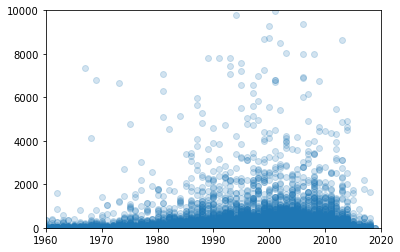

In [20]:
plt.scatter(filter_journal['year'], filter_journal['n_citation'], alpha = 0.2)
plt.ylim(0, 10000)
plt.xlim(1960, 2020)

In [21]:
filter_journal_citations = filter_journal[filter_journal['n_citation'] > 0]

In [22]:
sub_1000 = filter_journal_citations[filter_journal_citations['n_citation'] < 1000]

(array([4.6094e+04, 1.0055e+04, 4.6270e+03, 2.7860e+03, 1.7620e+03,
        1.2830e+03, 9.0300e+02, 6.6800e+02, 5.7200e+02, 4.7900e+02,
        3.7900e+02, 3.1400e+02, 2.4400e+02, 2.2000e+02, 2.0700e+02,
        1.7500e+02, 1.5800e+02, 1.3800e+02, 1.1800e+02, 9.9000e+01,
        1.0100e+02, 8.6000e+01, 8.4000e+01, 7.9000e+01, 6.6000e+01,
        6.5000e+01, 4.4000e+01, 5.0000e+01, 5.4000e+01, 3.8000e+01,
        3.2000e+01, 4.2000e+01, 3.9000e+01, 3.4000e+01, 2.7000e+01,
        2.5000e+01, 2.7000e+01, 1.8000e+01, 3.3000e+01, 1.8000e+01,
        1.9000e+01, 1.9000e+01, 2.7000e+01, 2.9000e+01, 2.2000e+01,
        1.8000e+01, 1.6000e+01, 1.4000e+01, 9.0000e+00, 1.1000e+01]),
 array([  1.  ,  20.96,  40.92,  60.88,  80.84, 100.8 , 120.76, 140.72,
        160.68, 180.64, 200.6 , 220.56, 240.52, 260.48, 280.44, 300.4 ,
        320.36, 340.32, 360.28, 380.24, 400.2 , 420.16, 440.12, 460.08,
        480.04, 500.  , 519.96, 539.92, 559.88, 579.84, 599.8 , 619.76,
        639.72, 659.68, 679.64

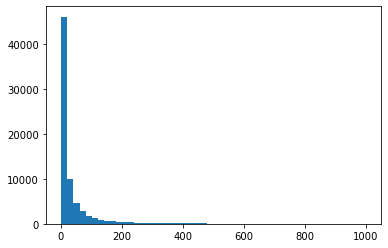

In [23]:
plt.hist(sub_1000['n_citation'], bins = 50)

In [123]:
#Out of 99967 entries - where year provided was between 1500 and 2020 (0.03% removal)
#73044 had 1 or more citations. ~ 73% had been cited more than once.
#0.8% of those entries had been cited more than 1000 times

total = len(filter_journal)
cit_1 = len(filter_journal_citations)
sub = len(sub_1000)

keywords = len(sub_1000[sub_1000['keywords'].str.len() > 0])

print(f'''Out of {total} entries where release year was noted between 1500 and 2020, 
{cit_1} had 1 or more citations. ~ {round(cit_1/total*100,1)}% had been cited more than once.
{cit_1-sub} had been cited more than 1000 times equating to roughly {round((cit_1-sub)/cit_1*100,2)}%.
There are {round(keywords,2)} with keywords notated, roughly {round((sub - keywords)/sub * 100,2)}% have no keywords''')



Out of 99967 entries where release year was noted between 1500 and 2020, 
73044 had 1 or more citations. ~ 73.1% had been cited more than once.
617 had been cited more than 1000 times equating to roughly 0.84%.
There are 56326 with keywords notated, roughly 22.23% have no keywords


In [143]:
from collections import Counter
import numpy as np
count_idx_new = Counter()
idx = 0
for keywords in tqdm(sub_1000['keywords']):
#     if idx > 100:
#         break
    try:
        if len(keywords) == 0:
            idx += 1
            continue
        elif len(keywords) == 1:
#             print(keywords)
            count_idx_new += Counter(keywords)
            idx += 1
        else:
#             print(count_idx_new[keywords[0]])
            count_idx_new[keywords[0]] += 1
            idx += 1
#         if not pd.isna(keywords).all() and len(keywords) > 0:
#         count_idx_new += Counter(keywords[0])
#         idx += 1
#         else:
#             idx +=1
#             pass
    except Exception as e:
#         print("error ",e ,idx,  keywords)
#         print(np.isnan(keywords))
        idx+=1
        pass
    
print(count_idx_new)

100%|██████████| 72427/72427 [00:08<00:00, 8837.39it/s] 

Counter({'Internet': 145, 'data mining': 111, 'computational complexity': 89, 'algorithms': 85, 'satisfiability': 68, 'null': 67, 'neural network': 63, 'information retrieval': 59, 'first page': 54, 'sufficient condition': 53, 'indexation': 53, 'computer science': 53, 'feature extraction': 48, 'software system': 48, 'computer vision': 48, 'optimisation': 47, 'Markov processes': 46, 'computational geometry': 45, 'design': 44, 'real time': 44, 'CMOS integrated circuits': 44, 'internet': 41, 'social network': 40, 'machine learning': 40, 'main result': 39, 'business process': 39, 'speech recognition': 39, 'artificial intelligence': 38, 'software engineering': 38, 'pattern recognition': 38, 'parallel algorithm': 37, 'feature selection': 37, 'VLSI': 36, 'ad hoc networks': 36, 'general': 35, 'Computational Mathematic': 35, 'programming language': 35, 'bioinformatics': 35, 'Information System': 34, 'support vector machine': 34, 'Bayes methods': 34, 'Gaussian processes': 34, 'data structure': 3

In [121]:
len(sub_1000[sub_1000['keywords'].str.len() > 0])

56326

In [146]:
len(count_idx.keys()) ,len(count_idx_new.keys())

(234827, 38510)

In [147]:
count_idx_new.most_common(100)

[('Internet', 145),
 ('data mining', 111),
 ('computational complexity', 89),
 ('algorithms', 85),
 ('satisfiability', 68),
 ('null', 67),
 ('neural network', 63),
 ('information retrieval', 59),
 ('first page', 54),
 ('sufficient condition', 53),
 ('indexation', 53),
 ('computer science', 53),
 ('feature extraction', 48),
 ('software system', 48),
 ('computer vision', 48),
 ('optimisation', 47),
 ('Markov processes', 46),
 ('computational geometry', 45),
 ('design', 44),
 ('real time', 44),
 ('CMOS integrated circuits', 44),
 ('internet', 41),
 ('social network', 40),
 ('machine learning', 40),
 ('main result', 39),
 ('business process', 39),
 ('speech recognition', 39),
 ('artificial intelligence', 38),
 ('software engineering', 38),
 ('pattern recognition', 38),
 ('parallel algorithm', 37),
 ('feature selection', 37),
 ('VLSI', 36),
 ('ad hoc networks', 36),
 ('general', 35),
 ('Computational Mathematic', 35),
 ('programming language', 35),
 ('bioinformatics', 35),
 ('Information Sy

In [151]:
labels, values = zip(*count_idx_new.most_common(20))

In [152]:
indexes = np.arange(len(labels))

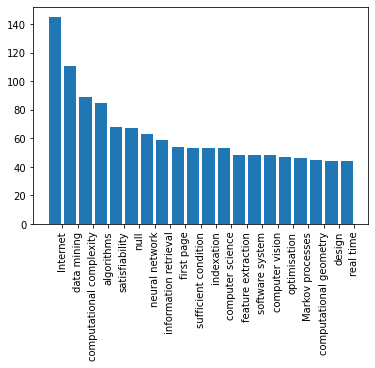

In [153]:
plt.bar(indexes, values)
plt.xticks(indexes + 0.5, labels, rotation = 90)
plt.show()

dict_values([42, 138, 330, 792, 49, 202, 243, 85, 43, 209, 428, 27, 55, 1, 1, 2, 16, 153, 241, 3, 1, 1, 14, 1, 48, 1, 1, 1, 2, 4, 32, 1, 10, 1, 1, 33, 30, 3, 115, 25, 63, 64, 21, 4, 1, 52, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 162, 9, 10, 3, 1, 1, 16, 23, 1, 6, 16, 2, 7, 1, 1, 1, 2, 1, 8, 1, 9, 268, 263, 99, 132, 168, 136, 2, 4, 224, 6, 289, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 22, 20, 451, 1, 5, 253, 52, 4, 308, 64, 20, 3, 4, 25, 5, 282, 6, 33, 1, 121, 4, 5, 42, 28, 101, 175, 366, 7, 6, 88, 1, 24, 535, 6, 9, 3, 15, 235, 7, 5, 7, 6, 10, 6, 8, 6, 11, 12, 6, 6, 15, 17, 6, 6, 3, 2, 2, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 53, 19, 5, 5, 5, 21, 9, 5, 5, 20, 9, 9, 10, 9, 9, 23, 9, 12, 14, 16, 11, 11, 9, 13, 10, 9, 9, 11, 10, 11, 9, 9, 9, 9, 9, 9, 10, 9, 9, 9, 16, 9, 9, 9, 9, 9, 16, 14, 15, 14, 14, 14, 14, 15, 12, 12, 15, 15, 21, 12, 12, 21, 16, 17, 12, 23, 8, 8, 49, 14, 8, 8, 10, 10, 10, 10, 11, 10, 25, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 8, 7, 7, 7, 7, 7, 